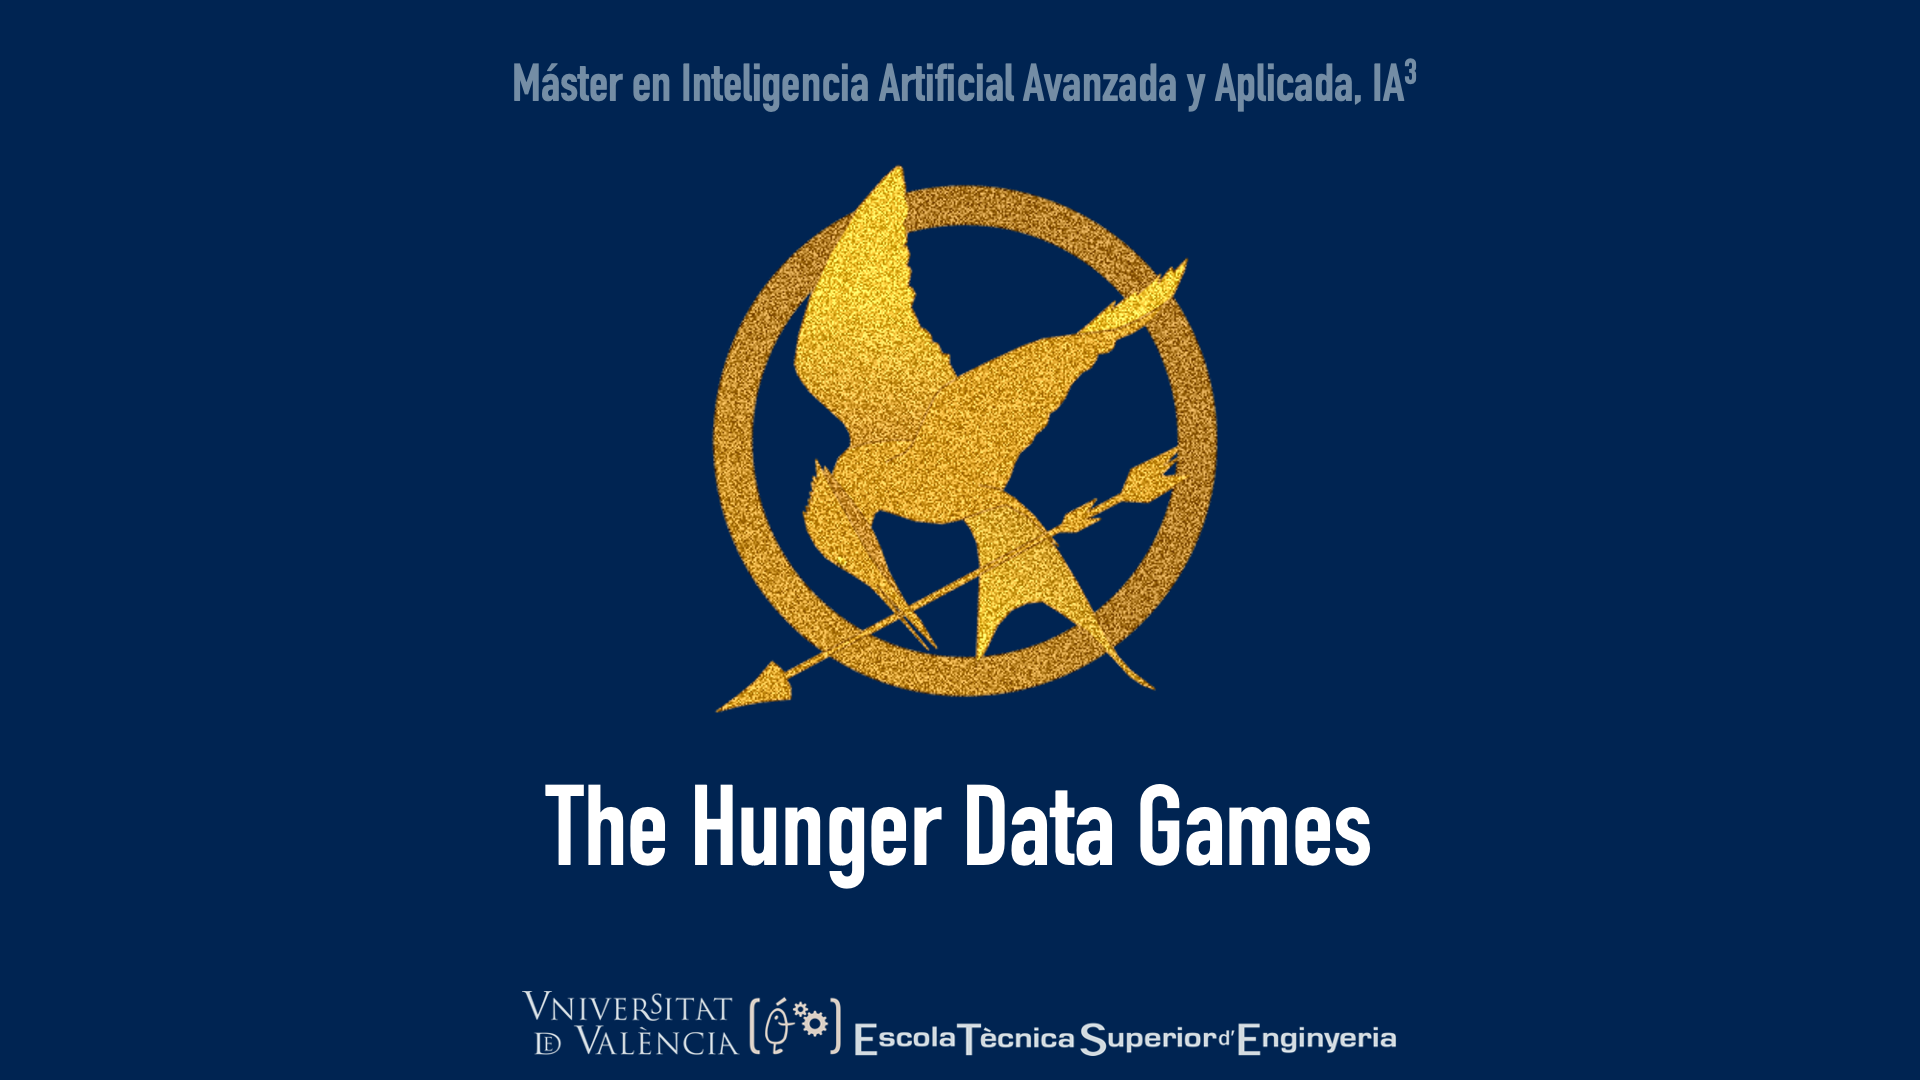

Wellcome to the first hunger data games!!! You have been selected as tributes from your sectors. In this edition you will be facing each other in a classification competition. The dataset you will be facing is this one:



A few recommendations for you to solve the exercise. Remember the different types of algorithm that we have studied and follow a natural path in building the exercise. Commence using a single estimator and try to build a bagging estimator.

For the evaluation metric check this webpage:

https://scikit-learn.org/stable/modules/model_evaluation.html

Specially check those called balanced_accuracy and f1_micro.

Finally the submission of the exercise must be a model file with the name of your team (find one which is cool I will add the coolness of the name to the final grade). 

Check this webpage for saving the model: https://scikit-learn.org/stable/modules/model_persistence.html

One more thing I will evaluate using the np.random.seed(123) use it for training your model.

# Team Data de Fresa
## Juan Vicent Camisón, Lucas Nicolini, Jorge Vila Tomás

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)
url = "https://github.com/Jorgvt/Master_IA3/blob/master/Introducci%C3%B3n%20a%20Python/Machine%20Learning/glass.csv?raw=true"
df = pd.read_csv(url, header=0)
#df.drop("Unnamed: 0", axis=1, inplace=True)
df.columns = ["refractive_index", "sodium", "magnesium", "aluminum", "silicon", "potassium", "calcium", "barium", "iron", "type_of_glass"]

The target variable is type_of_glass

In [ ]:
print(f"The dataframe has {len(df.columns)} columns and {len(df)} rows.")
df.head(10)

The dataframe has 10 columns and 214 rows.


,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


#Clean the data

The first thing will be looking for NaNs and setting the dtypes, etc:

In [ ]:
df.isna().sum()

refractive_index    0
sodium              0
magnesium           0
aluminum            0
silicon             0
potassium           0
calcium             0
barium              0
iron                0
type_of_glass       0
dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
df2 = df.copy()
df2 = df2.drop(["refractive_index", "type_of_glass"], axis = 1)

In [ ]:
df2 = df2.div(df2.sum(axis = 1), axis = 0)
df2["refractive_index"] = df["refractive_index"]
df2["type_of_glass"] = df["type_of_glass"]
df2.head()

,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,refractive_index,type_of_glass
0,0.136646,0.044981,0.011020,0.719094,0.000601,0.087658,0.0,0.0,1.52101,1
1,0.139053,0.036040,0.013615,0.728101,0.004805,0.078386,0.0,0.0,1.51761,1
2,0.135598,0.035578,0.015434,0.731509,0.003909,0.077972,0.0,0.0,1.51618,1
3,0.132644,0.037052,0.012953,0.729089,0.005723,0.082538,0.0,0.0,1.51766,1
4,0.132926,0.036262,0.012421,0.732044,0.005509,0.080837,0.0,0.0,1.51742,1


Looks like we dont have NaNs and the dtype is set to int64, so we're good to go.

#Exploring the data

A good first step is to check the correlation of the variables and do a couple of plots to explore the data we have.

In [ ]:
import plotly.express as px

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap = "coolwarm")

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
refractive_index,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
sodium,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
magnesium,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
aluminum,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
silicon,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
potassium,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
calcium,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
barium,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
iron,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
type_of_glass,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [ ]:
corr = df2.corr()
corr.style.background_gradient(cmap = "coolwarm")

,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,refractive_index,type_of_glass
sodium,1.000000,-0.272262,0.156006,-0.083589,-0.263683,-0.280120,0.324168,-0.250580,-0.195959,0.501735
magnesium,-0.272262,1.000000,-0.480818,-0.149371,0.005501,-0.443543,-0.492229,0.081859,-0.122744,-0.744929
aluminum,0.156006,-0.480818,1.000000,-0.007630,0.327016,-0.260597,0.478731,-0.075859,-0.407950,0.598258
silicon,-0.083589,-0.149371,-0.007630,1.000000,-0.173737,-0.218842,-0.119410,-0.142665,-0.554657,0.135598
potassium,-0.263683,0.005501,0.327016,-0.173737,1.000000,-0.317074,-0.042555,-0.008203,-0.289914,-0.010004
calcium,-0.280120,-0.443543,-0.260597,-0.218842,-0.317074,1.000000,-0.114333,0.121681,0.809722,0.000083
barium,0.324168,-0.492229,0.478731,-0.119410,-0.042555,-0.114333,1.000000,-0.058755,-0.000419,0.575088
iron,-0.250580,0.081859,-0.075859,-0.142665,-0.008203,0.121681,-0.058755,1.000000,0.142957,-0.188294
refractive_index,-0.195959,-0.122744,-0.407950,-0.554657,-0.289914,0.809722,-0.000419,0.142957,1.000000,-0.164237
type_of_glass,0.501735,-0.744929,0.598258,0.135598,-0.010004,0.000083,0.575088,-0.188294,-0.164237,1.000000


A good idea is to check the class balance, because that will be an important fact to assess:

In [ ]:
df["type_of_glass"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: type_of_glass, dtype: int64

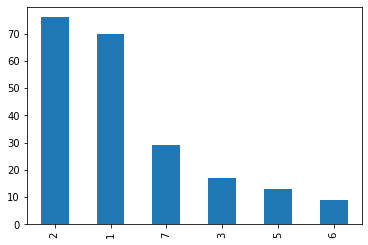

In [ ]:
df["type_of_glass"].value_counts().sort_values(ascending = False).plot(kind = "bar")
plt.show()

There is a clear class imbalance so we will have to adress that in the future.

In [ ]:
px.scatter(df, x = "calcium", y = "refractive_index", color = "type_of_glass")

We can, as well, explore the distributions of the different variables by applying the ```.hist()``` method on the dataset, which produces a histogram of every feature:

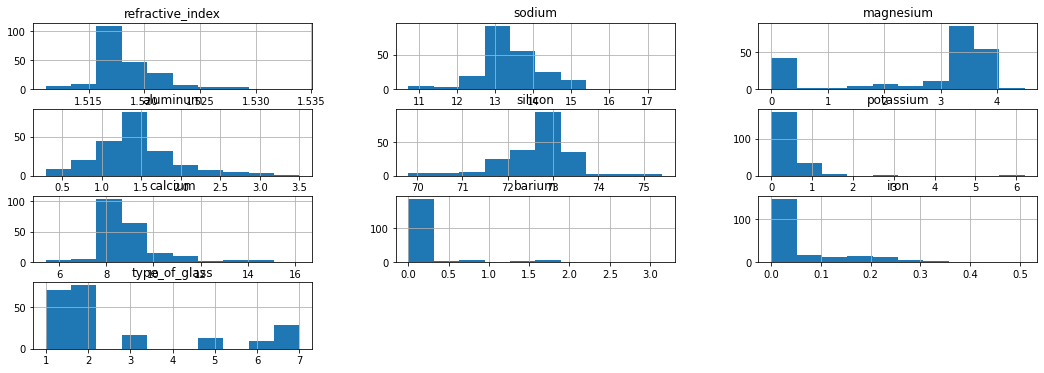

In [ ]:
df.hist(figsize = (18,6))
plt.show()

# Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.copy()
Y = X.pop("type_of_glass")

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify = Y)

# Setting a baseline

To be able to check if our models improve our ability to make predictions or not, we should establish a baseline using a very simple model with almost no tunning. By doing this we can set a bottom line from which we will be able to progress further up.

One of the most basic ideas would be using a *Decision Tree* or *Logistic Regression*. As the problem is imbalanced, we could use the ```f1_minor``` or ```balanced_accuracy``` metrics, so we start by importing them:

In [ ]:
from sklearn.metrics import f1_score, balanced_accuracy_score

In [ ]:
def f1_micro_score(y_true, y_pred):
    return f1_score(y_true, y_pred, average = "micro")

In [ ]:
def test_model(model, metrics = [f1_micro_score, balanced_accuracy_score]):
    score = [metric(Y_test, model.predict(X_test)) for metric in metrics]
    return score

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=200, max_depth = 3)
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model.score(X_test, Y_test)

0.734375

In [ ]:
test_model(model)

[0.676923076923077, 0.5467073480803458]

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:,1], drop_intermediate=False, pos_label=3)
df_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'threshold':thresholds})
fig = px.line(df_roc, x='fpr', y='tpr', hover_data=['threshold'])
fig.show()

# XGBOOST

In [ ]:
import xgboost as xgb

In [ ]:
Y.unique()

array([1, 2, 7, 6, 3, 5])

In [ ]:
mapping = {1:0, 2:1, 3:2, 5:3, 6:4, 7:5}

In [ ]:
cuac_train = np.array([mapping[label] for label in Y_train.to_numpy()])
cuac_test = np.array([mapping[label] for label in Y_test.to_numpy()])

In [ ]:
dtrain = xgb.DMatrix(X_train, label=cuac_train)
dtest = xgb.DMatrix(X_test, label=cuac_test)

In [ ]:
param = {'max_depth': 2, 'eta': 0.45, 'objective': 'multi:softmax', "num_class": 6}
#param['nthread'] = 4 # if we want to use all the cores there's no need to specify
param['eval_metric'] = ['merror']

In [ ]:
evallist = [(dtrain, 'train'), (dtest, 'test')]

In [ ]:
num_round = 100
bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=10)

[0]	train-merror:0.259259	test-merror:0.472222
Multiple eval metrics have been passed: 'test-merror' will be used for early stopping.

Will train until test-merror hasn't improved in 10 rounds.
[1]	train-merror:0.234568	test-merror:0.444444
[2]	train-merror:0.197531	test-merror:0.5
[3]	train-merror:0.135802	test-merror:0.444444
[4]	train-merror:0.135802	test-merror:0.416667
[5]	train-merror:0.148148	test-merror:0.416667
[6]	train-merror:0.135802	test-merror:0.416667
[7]	train-merror:0.074074	test-merror:0.388889
[8]	train-merror:0.074074	test-merror:0.388889
[9]	train-merror:0.074074	test-merror:0.388889
[10]	train-merror:0.061728	test-merror:0.388889
[11]	train-merror:0.061728	test-merror:0.361111
[12]	train-merror:0.049383	test-merror:0.388889
[13]	train-merror:0.049383	test-merror:0.361111
[14]	train-merror:0.049383	test-merror:0.388889
[15]	train-merror:0.012346	test-merror:0.388889
[16]	train-merror:0.012346	test-merror:0.361111
[17]	train-merror:0	test-merror:0.361111
[18]	train-

In [ ]:
num_round = 100
bst = xgb.cv(param, dtrain, num_round, 5, evallist, early_stopping_rounds=10)
bst

,train-merror-mean,train-merror-std,test-merror-mean,test-merror-std
0,0.246827,0.041943,0.345588,0.048552


In [ ]:
bst.save_model('0001.model')

AttributeError: ignored

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, bst.predict(dtest)))

In [ ]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)
        
cm = confusion_matrix(cuac_test, bst.predict(dtest))
plot_confusion_matrix(cm, list(range(6)))

## XGBoost - SkLearn

In [ ]:
xgb_sk = xgb.XGBRegressor()

In [ ]:
xgb_sk.load_model('0001.model')

In [ ]:
def test_model(model, metrics = [f1_micro_score, balanced_accuracy_score]):
    score = [metric(cuac_test, model.predict(X_test)) for metric in metrics]
    return score

In [ ]:
test_model(xgb_sk)

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(cuac_test, model.predict_proba(X_test)[:,1], drop_intermediate=False, pos_label=3)
df_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'threshold':thresholds})
fig = px.line(df_roc, x='fpr', y='tpr', hover_data=['threshold'])
fig.show()

## asfdld

In [ ]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = dtrain
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='merror', early_stopping_rounds=early_stopping_rounds, show_progress=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(predictors, dtrain['Disbursed'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions))
    print("MError Score (Train): " % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [ ]:
from xgboost.sklearn import XGBClassifier

In [ ]:
#Choose all predictors except target & IDcols
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, dtrain, cuac_train)

# Imbalanced

## SMOTE

Oversampling refers to copying or synthesizing new examples of the minority classes so that the number of examples in the minority class better resembles or matches the number of examples in the majority classes.

The most widely used approach to synthesizing new examples is called the Synthetic Minority Oversampling TEchnique or SMOTE for short. Paper about it: https://arxiv.org/abs/1106.1813

The ```imbalanced-learn``` library provides an implementation of SMOTE that we can use that is compatible with the popular scikit-learn library. We can install it as follows:

In [ ]:
!pip install imbalanced-learn

Next we can apply SMOTE to oversample the dataset. By default, SMOTE will oversample all classes to have the same number of 
examples as the class  with the most examples. 


In [ ]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
oversample = SMOTE(random_state=42)

In [ ]:
X_o, Y_o = oversample.fit_resample(X, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
X_o_train, Y_o_train = oversample.fit_resample(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
X_o_train, X_o_test, Y_o_train, Y_o_test = train_test_split(X_o, Y_o, test_size = 0.3, random_state = 42)

As we can see, the result is a dataset with balanced classes:

In [ ]:
df_o = pd.DataFrame(np.concatenate((X_o, Y_o.reshape(-1,1)), axis = 1), columns = ["refractive_index", "sodium", "magnesium", "aluminum", "silicon", "potassium", "calcium", "barium", "iron", "type_of_glass"])
df_o.type_of_glass =df_o.type_of_glass.astype(int) #The oversampling makes them float and we make them int so they are the same as in the beggining
df_o.head()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
0,0.136646,0.044981,0.011020,0.719094,0.000601,0.087658,0.0,0.0,1.52101,1
1,0.139053,0.036040,0.013615,0.728101,0.004805,0.078386,0.0,0.0,1.51761,1
2,0.135598,0.035578,0.015434,0.731509,0.003909,0.077972,0.0,0.0,1.51618,1
3,0.132644,0.037052,0.012953,0.729089,0.005723,0.082538,0.0,0.0,1.51766,1
4,0.132926,0.036262,0.012421,0.732044,0.005509,0.080837,0.0,0.0,1.51742,1


In [ ]:
df_o["type_of_glass"].value_counts()

7    76
6    76
5    76
3    76
2    76
1    76
Name: type_of_glass, dtype: int64

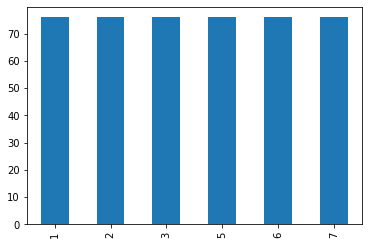

In [ ]:
df_o["type_of_glass"].value_counts().sort_values(ascending = False).plot(kind = "bar")
plt.show()

We can check that no entries have been duplicated. They have been oversampled.



In [ ]:
df_o.duplicated().sum()

0

Now we can check if there is any improvement in our baseline:

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_o, Y_o, test_size=0.3, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=200, max_depth = 3)
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model.score(X_test, Y_test)

0.734375

In [ ]:
def f1_micro_score(y_true, y_pred):
    return f1_score(y_true, y_pred, average = "micro")

In [ ]:
def test_model(model, metrics = [f1_micro_score, balanced_accuracy_score]):
    score = [metric(Y_test, model.predict(X_test)) for metric in metrics]
    return score

In [ ]:
test_model(model)

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:,1], drop_intermediate=False, pos_label=7)
df_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'threshold':thresholds})
fig = px.line(df_roc, x='fpr', y='tpr', hover_data=['threshold'])
fig.show()

# CrossValidation

In [ ]:
from sklearn.model_selection import cross_validate

## Non Oversampled

In [ ]:
model = RandomForestClassifier(n_estimators=200, max_depth = 3)
scores = cross_validate(model, X, Y, scoring = ["f1_micro", "balanced_accuracy"], cv = 6, n_jobs = -1) #We cant use cv>6 because our least populated category has 6 entries
print(f"Balanced_Accuracy: {scores['test_balanced_accuracy'].mean()}\nF1_micro: {scores['test_f1_micro'].mean()}")

## Oversampled

In [ ]:
model = RandomForestClassifier(n_estimators=200, max_depth = 3)
scores = cross_validate(model, X_o, Y_o, scoring = ["f1_micro", "balanced_accuracy"], cv = 10, n_jobs = -1)
print(f"Balanced_Accuracy: {scores['test_balanced_accuracy'].mean()}\nF1_micro: {scores['test_f1_micro'].mean()}")

# RandomSearcCV

Interesting webpage for tunning a RandomForestClassifier: https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
from scipy.stats import uniform, truncnorm, randint

In [ ]:
param_grid = {"n_estimators" :np.arange(1,1000,10),
    "max_depth" : np.arange(1, 10, 1),
    "min_samples_split" : np.arange(1,5,1),
    "max_leaf_nodes" : np.arange(1,50,5),
    "min_samples_leaf" : np.arange(1,5,1),
    "max_samples" : np.linspace(0,1,10),
    "max_features" : np.linspace(0,1,10)}

In [ ]:
param_distributions = {"n_estimators" :randint(500, 1250),
    "max_depth" : randint(7, 13),
    "min_samples_split" : randint(1,5),
    "max_leaf_nodes" : randint(20,60),
    "min_samples_leaf" : randint(1,5),
    "max_samples" : truncnorm(0.5,1),
    "max_features" : truncnorm(0.5,1)}

In [ ]:
param_distributions = {"n_estimators" :randint(1,500),
    "max_depth" : randint(7, 13),
    "min_samples_split" : randint(1,5),
    "max_leaf_nodes" : randint(20,60),
    "min_samples_leaf" : randint(1,5),
    "max_samples" : truncnorm(0.5,1),
    "max_features" : truncnorm(0.5,1)}

## No Oversampling

In [ ]:
gs_no = RandomizedSearchCV(RandomForestClassifier(), param_distributions = param_grid, n_iter = 500, scoring = ["f1_micro", "balanced_accuracy"], n_jobs = -1, cv = 6, refit = False)
gs_no.fit(X, Y)

In [ ]:
res_no = pd.DataFrame(gs_no.cv_results_).sort_values(by = ["mean_test_f1_micro", "mean_test_balanced_accuracy"], ascending = False)
res_no.head()

In [ ]:
res_no.iloc[0]["mean_test_f1_micro"], res_no.iloc[0]["mean_test_balanced_accuracy"]

In [ ]:
res_no.iloc[0]["params"]

## Oversampling

In [ ]:
gs_o = RandomizedSearchCV(RandomForestClassifier(), param_distributions = param_distributions, n_iter = 500, scoring = "f1_micro", n_jobs = -1, cv = 6, refit = True, random_state = 42)
gs_o.fit(X_o_train, Y_o_train)

RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
res_o = pd.DataFrame(gs_o.cv_results_).sort_values(by = ["mean_test_score"], ascending = False)
res_o.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,param_max_samples,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
86,1.218404,0.016113,0.062886,0.001557,11,0.655908,37,0.980767,1,2,442,"{'max_depth': 11, 'max_features': 0.6559082032...",0.826923,0.884615,0.903846,0.942308,0.903846,0.942308,0.900641,0.039124,1
300,0.864022,0.011353,0.048576,0.002026,10,0.506254,30,0.778656,2,2,330,"{'max_depth': 10, 'max_features': 0.5062539109...",0.807692,0.903846,0.923077,0.942308,0.884615,0.942308,0.900641,0.046336,1
498,0.173718,0.002020,0.011157,0.000112,10,0.524737,39,0.710893,2,4,70,"{'max_depth': 10, 'max_features': 0.5247365346...",0.807692,0.865385,0.942308,0.903846,0.903846,0.961538,0.897436,0.050474,3
172,1.196685,0.006479,0.067145,0.001663,9,0.528175,33,0.83623,2,2,476,"{'max_depth': 9, 'max_features': 0.52817489046...",0.826923,0.903846,0.923077,0.942308,0.865385,0.923077,0.897436,0.039515,3
447,0.517563,0.007381,0.030605,0.002468,12,0.519734,52,0.711854,1,2,203,"{'max_depth': 12, 'max_features': 0.5197341705...",0.826923,0.903846,0.923077,0.942308,0.865385,0.923077,0.897436,0.039515,3


In [ ]:
from scipy.stats import ttest_ind

In [ ]:
top_5 = res_o[["split0_test_f1_micro", "split1_test_f1_micro", "split2_test_f1_micro","split3_test_f1_micro","split4_test_f1_micro","split5_test_f1_micro"]].to_numpy()
ttest_ind(top_5[0], top_5[1])

Ttest_indResult(statistic=0.11222503481081156, pvalue=0.9128657580432422)

In [ ]:
res_o.iloc[0]["mean_test_score"]

0.9006410256410257

In [ ]:
res_o.iloc[0]["params"]

{'max_depth': 11,
 'max_features': 0.6559082032596242,
 'max_leaf_nodes': 37,
 'max_samples': 0.9807672246431345,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 442}

In [ ]:
f1_score(Y_test, gs_o.predict(X_test), average="micro"), balanced_accuracy_score(Y_test, gs_o.predict(X_test))

(0.75, 0.7855639730639731)

In [ ]:
wdres_o.iloc[1]["params"]

{'max_depth': 7,
 'max_features': 0.4675313777237168,
 'max_leaf_nodes': 35,
 'max_samples': 0.9917319129530874,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 805}

 (0.8815789473684209, 0.8810541310541312)

# SVM

In [ ]:
from sklearn import svm

In [ ]:
param_distributions = {"kernel": ["linear", "poly", "rbf", "sigmoid"],
                       "degree": randint(1,10),
                       "gamma": uniform(1,5),
                       "C": uniform(0,2)
                       }

In [ ]:
kernels = ["linear", "poly", "rbf", "sigmoid"]

## Sin Oversampling

In [ ]:
model_svm = svm.SVC(decision_function_shape='ovo', class_weight = "balanced")

In [ ]:
model_svm.fit(X_train, Y_train)

In [ ]:
model_svm.score(X_test, Y_test)

In [ ]:
for kernel in kernels:
    cuac = svm.SVC(decision_function_shape='ovo', class_weight = "balanced", kernel = kernel).fit(X_train, Y_train)
    print(f"Kernel: {kernel} -> {cuac.score(X_test, Y_test)}")

Kernel: linear -> 0.3611111111111111
Kernel: poly -> 0.16666666666666666
Kernel: rbf -> 0.19444444444444445
Kernel: sigmoid -> 0.19444444444444445


In [ ]:
svm_no = RandomizedSearchCV(RandomForestClassifier(), param_distributions = param_grid, n_iter = 500, scoring = ["f1_micro", "balanced_accuracy"], n_jobs = -1, cv = 6, refit = False)
svm_no.fit(X, Y)

In [ ]:
svm_no = pd.DataFrame(svm_no.cv_results_).sort_values(by = ["mean_test_f1_micro", "mean_test_balanced_accuracy"], ascending = False)
svm_no.iloc[0]["mean_test_f1_micro"], svm_no.iloc[0]["mean_test_balanced_accuracy"]
svm_no.iloc[0]["params"]

## Con Oversampling

In [ ]:
for kernel in kernels:
    cuac = svm.SVC(decision_function_shape='ovo', class_weight = "balanced", kernel = kernel).fit(X_o_train, Y_o_train)
    print(f"Kernel: {kernel} -> {cuac.score(X_o_test, Y_o_test)}")

Kernel: linear -> 0.1678832116788321
Kernel: poly -> 0.1678832116788321
Kernel: rbf -> 0.1678832116788321
Kernel: sigmoid -> 0.1678832116788321


In [ ]:
for kernel in kernels:
    cuac = svm.SVC(decision_function_shape='ovo', kernel = kernel).fit(X_o_train, Y_o_train)
    print(f"Kernel: {kernel} -> {cuac.score(X_o_test, Y_o_test)}")

Kernel: linear -> 0.10218978102189781
Kernel: poly -> 0.10218978102189781
Kernel: rbf -> 0.10218978102189781
Kernel: sigmoid -> 0.10218978102189781


### RBF

In [ ]:
param_distributions = {"gamma": uniform(0.001,2),
                       "C": uniform(0,12)
                       }

In [ ]:
svm_o = RandomizedSearchCV(svm.SVC(decision_function_shape='ovo', class_weight = "balanced", kernel = "rbf"), param_distributions = param_distributions, n_iter = 1000, scoring = ["f1_micro", "balanced_accuracy"], n_jobs = -1, cv = 6, refit = False)
svm_o.fit(X_o, Y_o)

RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight='balanced', coef0=0.0,
                                 decision_function_shape='ovo', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=1000, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f12cad29390>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f12cad291d0>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=False,
                   return_train_score=False,
                   scoring=['f1_micro', 'balanced_accuracy'], verbose=0)

In [ ]:
svm_o = pd.DataFrame(svm_o.cv_results_).sort_values(by = ["mean_test_f1_micro", "mean_test_balanced_accuracy"], ascending = False)
svm_o.iloc[0]["mean_test_f1_micro"], svm_o.iloc[0]["mean_test_balanced_accuracy"]

(0.5460526315789475, 0.5418447293447293)

In [ ]:
svm_o.iloc[0]["params"]

{'C': 11.20852333165282, 'gamma': 1.9699376883907558}

### Poly

In [ ]:
param_distributions = {"gamma": truncnorm(7.5,10),
                       "C": truncnorm(1,5),
                       "degree": randint(1,3),
                       "coef0": truncnorm(-3.5,-1.5),

                       }

In [ ]:
svm_o = RandomizedSearchCV(svm.SVC(decision_function_shape='ovo', class_weight = None, kernel = "poly", max_iter = 1e5), param_distributions = param_distributions, n_iter = 1000, scoring = ["f1_micro", "balanced_accuracy"], n_jobs = -1, cv = 6, refit = False, random_state = 42)
svm_o.fit(X_o, Y_o)

RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovo', degree=3,
                                 gamma='scale', kernel='poly',
                                 max_iter=100000.0, probability=False,
                                 random_state=None, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=1000, n_jobs=-1,
                   param_distributions={'C': <scip...
                                        'coef0': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f42c43ad630>,
                                        'degree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f42c43adeb8>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f42c41366d8>},
     

In [ ]:
svm_o = pd.DataFrame(svm_o.cv_results_).sort_values(by = ["mean_test_f1_micro", "mean_test_balanced_accuracy"], ascending = False)
svm_o.iloc[0]["mean_test_f1_micro"], svm_o.iloc[0]["mean_test_balanced_accuracy"]

(0.8333333333333334, 0.830026455026455)

In [ ]:
svm_o.iloc[0]["params"]

{'C': 1.1939217123118353,
 'coef0': -2.173640394415587,
 'degree': 2,
 'gamma': 7.974438952399729}

### Sigmoid

In [ ]:
param_distributions = {"gamma": uniform(0,10),
                       "C": uniform(0,10),
                       "coef0": uniform(-5,5),

                       }

In [ ]:
svm_o = RandomizedSearchCV(svm.SVC(decision_function_shape='ovo', class_weight = None, kernel = "sigmoid", max_iter = 1e5), param_distributions = param_distributions, n_iter = 1000, scoring = ["f1_micro", "balanced_accuracy"], n_jobs = -1, cv = 6, refit = False, random_state = 42)
svm_o.fit(X_o, Y_o)

RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovo', degree=3,
                                 gamma='scale', kernel='sigmoid',
                                 max_iter=100000.0, probability=False,
                                 random_state=None, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=1000, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f42c3ffbd68>,
                                        'coef0': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f42c3ffb2e8>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f42c3ffb240>},
                   pre_dispatch='2*n_jobs', random_state=42, 

In [ ]:
svm_o = pd.DataFrame(svm_o.cv_results_).sort_values(by = ["mean_test_f1_micro", "mean_test_balanced_accuracy"], ascending = False)
svm_o.iloc[0]["mean_test_f1_micro"], svm_o.iloc[0]["mean_test_balanced_accuracy"]

(0.14634146341463414, 0.16666666666666666)

In [ ]:
svm_o.iloc[0]["params"]

{'C': 3.745401188473625,
 'coef0': -0.24642846795041962,
 'gamma': 7.319939418114051}

# LinearSVM

## Sin Oversampling

In [ ]:
model_lsvm = svm.LinearSVC(penalty = "l2", max_iter = 1000000000, random_state = 42, multi_class="crammer_singer")
model_lsvm.fit(X_train, Y_train)
model_lsvm.score(X_test, Y_test)

0.5

In [ ]:
model_lsvm = svm.LinearSVC(penalty = "l2", max_iter = 1000000000, random_state = 42, class_weight = "balanced", multi_class="crammer_singer")
model_lsvm.fit(X_train, Y_train)
model_lsvm.score(X_test, Y_test)

0.3333333333333333

## Con Oversampling

In [ ]:
model_lsvm = svm.LinearSVC(penalty = "l2", max_iter = 1000000000, random_state = 42, multi_class="crammer_singer")
model_lsvm.fit(X_o_train, Y_o_train)
model_lsvm.score(X_o_test, Y_o_test)

0.6774193548387096

In [ ]:
model_lsvm = svm.LinearSVC(penalty = "l2", max_iter = 1000000000, random_state = 42, class_weight = "balanced", multi_class="crammer_singer")
model_lsvm.fit(X_o_train, Y_o_train)
model_lsvm.score(X_o_test, Y_o_test)

0.6451612903225806

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression(max_iter = 1e5)
log_model.fit(X_train, Y_train)
log_model.score(X_test, Y_test)

0.5

In [ ]:
log_model = LogisticRegression(max_iter = 1e5, class_weight="balanced")
log_model.fit(X_train, Y_train)
log_model.score(X_test, Y_test)

0.4722222222222222

In [ ]:
log_model = LogisticRegression(max_iter = 1e5)
log_model.fit(X_o_train, Y_o_train)
log_model.score(X_o_test, Y_o_test)

0.18248175182481752

In [ ]:
log_model = LogisticRegression(max_iter = 1e5, class_weight="balanced")
log_model.fit(X_o_train, Y_o_train)
log_model.score(X_o_test, Y_o_test)

0.5547445255474452

In [ ]:
param_distributions = {"C": uniform(-5, 5),                  
                       }

In [ ]:
log_o = RandomizedSearchCV(LogisticRegression(max_iter = 1e5), param_distributions = param_distributions, n_iter = 100, scoring = ["f1_micro", "balanced_accuracy"], n_jobs = -1, cv = 6, refit = False)
log_o.fit(X_o, Y_o)

RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None,
                                                max_iter=100000.0,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f12cad09fd0>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=False,
                   return_train_sco

In [ ]:
log_o = pd.DataFrame(log_o.cv_results_).sort_values(by = ["mean_test_f1_micro", "mean_test_balanced_accuracy"], ascending = False)
log_o.iloc[0]["mean_test_f1_micro"], log_o.iloc[0]["mean_test_balanced_accuracy"]

(nan, nan)

In [ ]:
log_o.iloc[0]["params"]

{'C': -0.585399283775196}

# Random Search Graphs

In [ ]:
param_distributions = {"n_estimators" :randint(1, 1000),
    "max_depth" : randint(1, 10),
    "min_samples_split" : randint(1,5),
    "max_leaf_nodes" : randint(1,50),
    "min_samples_leaf" : randint(1,5),
    "max_samples" : uniform(0,1),
    "max_features" : uniform(0,1)}

In [ ]:
rs = [RandomizedSearchCV(RandomForestClassifier(), param_distributions = param_distributions, n_iter = iter, scoring = ["f1_micro", "balanced_accuracy"], n_jobs = -1, cv = 6, refit = False).fit(X_o, Y_o) for iter in range(1, 50)]

In [ ]:
scores = []
for cuac in rs:
    svm_o = pd.DataFrame(cuac.cv_results_).sort_values(by = ["mean_test_f1_micro", "mean_test_balanced_accuracy"], ascending = False)
    scores.append([(svm_o["mean_test_f1_micro"]>0.8).sum(), (svm_o["mean_test_balanced_accuracy"]>0.8).sum()])
scores = np.array(scores)

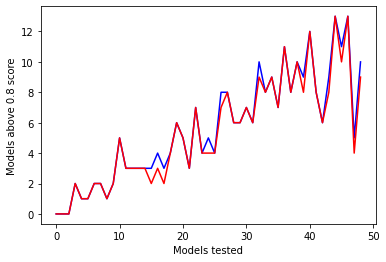

In [ ]:
plt.plot(scores[:, 0], 'b', label = "F1_micro")
plt.plot(scores[:, 1], 'r', label = "Balanced_Accuracy")
plt.xlabel("Models tested")
plt.ylabel("Models above 0.8 score")
plt.show()

# NN

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
le.fit(Y_o_train)


LabelEncoder()

In [ ]:
X_o.shape, Y_o.shape

((246, 9), (246,))

In [ ]:
pd.get_dummies(Y_o).to_numpy().shape

(246, 6)

In [ ]:
nn = tf.keras.Sequential([
    tf.keras.layers.Dense(6, input_shape = [X_o.shape[1]], name = "Input", activation = "relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(6, activation= "softmax")
])

In [ ]:
nn.compile(optimizer = "adam",
           loss = tf.keras.losses.SparseCategoricalCrossentropy(),
           metrics = ["accuracy"])

In [ ]:
nn.fit(X_o_train, le.transform(Y_o_train), epochs= 500, validation_data=(X_o_test, le.transform(Y_o_test)), verbose = 2)

Epoch 1/500
6/6 - 0s - loss: 6.5664 - accuracy: 0.1522 - val_loss: 3.2218 - val_accuracy: 0.2097
Epoch 2/500
6/6 - 0s - loss: 5.1470 - accuracy: 0.1576 - val_loss: 2.8521 - val_accuracy: 0.1129
Epoch 3/500
6/6 - 0s - loss: 4.2708 - accuracy: 0.1848 - val_loss: 2.2457 - val_accuracy: 0.1129
Epoch 4/500
6/6 - 0s - loss: 3.4681 - accuracy: 0.2065 - val_loss: 2.0469 - val_accuracy: 0.1935
Epoch 5/500
6/6 - 0s - loss: 3.1592 - accuracy: 0.1576 - val_loss: 1.9738 - val_accuracy: 0.1935
Epoch 6/500
6/6 - 0s - loss: 2.7214 - accuracy: 0.1576 - val_loss: 1.8225 - val_accuracy: 0.2097
Epoch 7/500
6/6 - 0s - loss: 2.2895 - accuracy: 0.1467 - val_loss: 1.7838 - val_accuracy: 0.1129
Epoch 8/500
6/6 - 0s - loss: 1.9840 - accuracy: 0.1848 - val_loss: 1.7766 - val_accuracy: 0.1129
Epoch 9/500
6/6 - 0s - loss: 1.8196 - accuracy: 0.1685 - val_loss: 1.9837 - val_accuracy: 0.0484
Epoch 10/500
6/6 - 0s - loss: 1.8461 - accuracy: 0.2065 - val_loss: 2.0327 - val_accuracy: 0.0484
Epoch 11/500
6/6 - 0s - loss:

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_o_train, Y_o_train)
knn.score(X_test, Y_test)

0.71875

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_o_train_pt, Y_o_train)
knn.score(X_o_test_pt, Y_o_test)

NameError: ignored

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_o_train_max, Y_o_train)
knn.score(X_o_test_max, Y_o_test)

0.7372262773722628

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)

0.640625

## Random Search

### Sin Oversampling

In [ ]:
param_distributions = {"n_neighbors": randint(0,97),
                       "weights": ["uniform", "distance"],
                       "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
                       "leaf_size": randint(10,80),
                       "p": randint(1,10),
                       "metric": ["euclidean", "manhattan", "chebyshev", "minkowski","seuclidean", "mahalanobis"]
                       }

In [ ]:
knn_o = RandomizedSearchCV(KNeighborsClassifier(), param_distributions = param_distributions, n_iter = 1000, scoring = ["f1_micro", "balanced_accuracy"], n_jobs = -1, cv = 6, refit = False, random_state=42)
knn_o.fit(X, Y)

RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=1000, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': <scipy.stats._distn_infrastructure.rv_f...
                                                   'chebyshev', 'minkowski',
                                                   'seuclidean',
                                                   'mahalanobis'],
                 

In [ ]:
knn_o = pd.DataFrame(knn_o.cv_results_).sort_values(by = ["mean_test_f1_micro", "mean_test_balanced_accuracy"], ascending = False)
knn_o.iloc[0]["mean_test_f1_micro"], knn_o.iloc[0]["mean_test_balanced_accuracy"]

(0.6771929824561403, 0.6521164021164022)

In [ ]:
knn_o.iloc[0]["params"]

{'algorithm': 'auto',
 'leaf_size': 22,
 'metric': 'manhattan',
 'n_neighbors': 1,
 'p': 5,
 'weights': 'uniform'}

### Oversampling

In [ ]:
param_distributions = {"n_neighbors": randint(0,124),
                       "weights": ["uniform", "distance"],
                       "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
                       "leaf_size": randint(1,100),
                       "p": randint(1,10),
                       "metric": ["euclidean", "manhattan", "chebyshev", "minkowski","seuclidean", "mahalanobis"]
                       }

In [ ]:
param_distributions = {"n_neighbors": randint(0,5),
                       "weights": ["distance"],
                       "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
                       "leaf_size": randint(15,50),
                       "p": randint(6,10),
                       "metric": ["euclidean", "manhattan", "chebyshev", "minkowski","seuclidean", "mahalanobis"]
                       }

algorithm='brute', leaf_size=20, metric='seuclidean',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=9,
                     weights='distance')

In [ ]:
knn_o = RandomizedSearchCV(KNeighborsClassifier(), param_distributions = param_distributions, n_iter = 500, scoring = ["f1_micro", "balanced_accuracy"], n_jobs = -1, cv = 6, refit = False, random_state=42)
knn_o.fit(X_o_train, Y_o_train)

RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=500, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': <scipy.stats._distn_infrastructure.rv_fr...
                                                   'chebyshev', 'minkowski',
                                                   'seuclidean',
                                                   'mahalanobis'],
                 

In [ ]:
knn_o = RandomizedSearchCV(KNeighborsClassifier(), param_distributions = param_distributions, n_iter = 500, scoring = "accuracy", n_jobs = -1, cv = 6, refit = True, random_state=42)
knn_o.fit(X_o_train, Y_o_train)
print(knn_o.best_score_)
knn_o.score(X_test, Y_test), f1_score(Y_test, cuac.predict(X_test), average="micro"), balanced_accuracy_score(Y_test, cuac.predict(X_test))

0.9056603773584905


(0.828125, 0.765625, 0.7828157349896481)

In [ ]:
knn_o = pd.DataFrame(knn_o.cv_results_).sort_values(by = ["mean_test_f1_micro", "mean_test_balanced_accuracy"], ascending = False)
knn_o.iloc[0]["mean_test_f1_micro"], knn_o.iloc[0]["mean_test_balanced_accuracy"]

(0.9056603773584905, 0.9054783950617283)

In [ ]:
knn_o.iloc[0]["params"]

{'algorithm': 'brute',
 'leaf_size': 25,
 'metric': 'seuclidean',
 'n_neighbors': 1,
 'p': 8,
 'weights': 'distance'}

In [ ]:
cuac = KNeighborsClassifier(algorithm = "brute", leaf_size=28, metric="manhattan", n_neighbors=1, p=6, weights="distance")
cuac.fit(X_o_train, Y_o_train)
cuac.score(X_test, Y_test), f1_score(Y_test, cuac.predict(X_test), average="micro"), balanced_accuracy_score(Y_test, cuac.predict(X_test))

(0.765625, 0.765625, 0.7828157349896481)

# KRR

In [ ]:
from sklearn.linear_model import RidgeClassifier

In [ ]:
krc = RidgeClassifier()
krc.fit(X_o_train, Y_o_train)
krc.score(X_o_test, Y_o_test)

0.6204379562043796

In [ ]:
krc = RidgeClassifier(class_weight="balanced")
krc.fit(X_o_train, Y_o_train)
krc.score(X_o_test, Y_o_test)

0.6861313868613139

In [ ]:
param_distributions = {"alpha": uniform(0.00001,1),
                       "solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"],
}

In [ ]:
knn_o = RandomizedSearchCV(RidgeClassifier(random_state=42, class_weight="balanced"), param_distributions = param_distributions, n_iter = 1000, scoring = ["f1_micro", "balanced_accuracy"], n_jobs = -1, cv = 6, refit = False, random_state=42)
knn_o.fit(X_o, Y_o)

RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=RidgeClassifier(alpha=1.0, class_weight='balanced',
                                             copy_X=True, fit_intercept=True,
                                             max_iter=None, normalize=False,
                                             random_state=42, solver='auto',
                                             tol=0.001),
                   iid='deprecated', n_iter=1000, n_jobs=-1,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7670aa76d8>,
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sparse_cg', 'sag',
                                                   'saga']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=False,
                   return_train_score=False,
                   scoring=['f1_micro', 'balanced_accuracy'], verbose

In [ ]:
knn_o = pd.DataFrame(knn_o.cv_results_).sort_values(by = ["mean_test_f1_micro", "mean_test_balanced_accuracy"], ascending = False)
knn_o.iloc[0]["mean_test_f1_micro"], knn_o.iloc[0]["mean_test_balanced_accuracy"]

(0.6951754385964911, 0.6955128205128206)

In [ ]:
knn_o.iloc[0]["params"]

{'alpha': 0.001130111480109487, 'solver': 'svd'}

# GPC

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier

In [ ]:
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, DotProduct, Matern, RationalQuadratic, WhiteKernel

In [ ]:
kernel = ConstantKernel(constant_value=1.0, constant_value_bounds=(1e-5, 10.0)) * RBF(length_scale=0.5, length_scale_bounds=(1e-5, 10.0)) + RBF(length_scale=2.0, length_scale_bounds=(1e-5, 10.0))


In [ ]:
gpc = GaussianProcessClassifier(kernel=kernel,n_restarts_optimizer = 6, random_state=42)
gpc.fit(X_o_train, Y_o_train)

GaussianProcessClassifier(copy_X_train=True,
                          kernel=1**2 * RBF(length_scale=0.5) + RBF(length_scale=2),
                          max_iter_predict=100, multi_class='one_vs_rest',
                          n_jobs=None, n_restarts_optimizer=6,
                          optimizer='fmin_l_bfgs_b', random_state=42,
                          warm_start=False)

In [ ]:
gpc.score(X_o_test, Y_o_test)

0.7903225806451613

In [ ]:
param_distributions = {"kernel": [ConstantKernel(), RBF(), DotProduct(), Matern(), RationalQuadratic(), WhiteKernel()],
}

In [ ]:
knn_o = GridSearchCV(GaussianProcessClassifier(), param_grid = param_distributions, scoring = ["f1_micro", "balanced_accuracy"], n_jobs = -1, cv = 6, refit = False)
knn_o.fit(X_o, Y_o)

GridSearchCV(cv=6, error_score=nan,
             estimator=GaussianProcessClassifier(copy_X_train=True, kernel=None,
                                                 max_iter_predict=100,
                                                 multi_class='one_vs_rest',
                                                 n_jobs=None,
                                                 n_restarts_optimizer=0,
                                                 optimizer='fmin_l_bfgs_b',
                                                 random_state=None,
                                                 warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'kernel': [1**2, RBF(length_scale=1),
                                    DotProduct(sigma_0=1),
                                    Matern(length_scale=1, nu=1.5),
                                    RationalQuadratic(alpha=1, length_scale=1),
                                    WhiteKernel(noise_level=1)]},
           

In [ ]:
knn_o = pd.DataFrame(knn_o.cv_results_).sort_values(by = ["mean_test_f1_micro", "mean_test_balanced_accuracy"], ascending = False)
knn_o.iloc[0]["mean_test_f1_micro"], knn_o.iloc[0]["mean_test_balanced_accuracy"]

(0.7723577235772358, 0.7718253968253969)

In [ ]:
knn_o.iloc[0]["params"]

{'kernel': RationalQuadratic(alpha=1, length_scale=1)}

### Scalings

# Scalings

No parecen hacer nada

## Power Transform

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
pt = PowerTransformer(method = "yeo-johnson")
pt.fit(X_o_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


PowerTransformer(copy=True, method='yeo-johnson', standardize=True)

In [ ]:
X_o_train_pt = pt.transform(X_o_train)
X_o_test_pt = pt.transform(X_o_test)

In [ ]:
rf1 = RandomForestClassifier()
rf2 = RandomForestClassifier()

In [ ]:
rf1.fit(X_o_train_pt, Y_o_train)
rf2.fit(X_o_train, Y_o_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
f1_score(Y_o_test, rf1.predict(X_o_test_pt), average="micro"), balanced_accuracy_score(Y_o_test, rf1.predict(X_o_test_pt))

(0.8225806451612904, 0.8565323565323566)

In [ ]:
f1_score(Y_o_test, rf2.predict(X_o_test), average="micro"), balanced_accuracy_score(Y_o_test, rf1.predict(X_o_test))

(0.8548387096774194, 0.2239316239316239)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d322b93c8>,
      dtype=object)

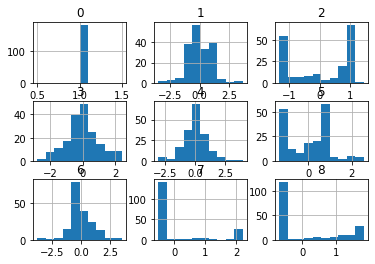

In [ ]:
pd.DataFrame(X_o_train_pt).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d328a3438>,
      dtype=object)

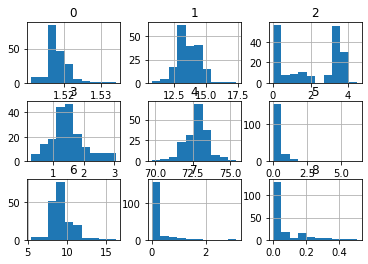

In [ ]:
pd.DataFrame(X_o_train).hist()

## Min Max Abs

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

In [ ]:
max = MaxAbsScaler()
max.fit(X_o_train)

MaxAbsScaler(copy=True)

In [ ]:
X_o_train_max = max.transform(X_o_train)
X_o_test_max = max.transform(X_o_test)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7670b7bb70>,
      dtype=object)

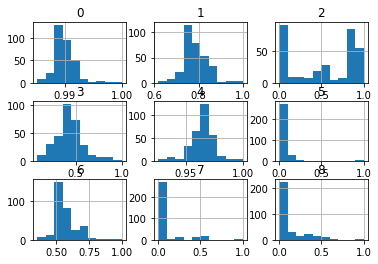

In [ ]:
pd.DataFrame(X_o_train_max).hist()

# XGBOOST 2

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
encoder.fit(Y_o_train)
Y_o_train_xgb = encoder.transform(Y_o_train)
Y_test_xgb = encoder.transform(Y_test)

In [ ]:
data_dmatrix = xgb.DMatrix(data=X_o_train,label=Y_o_train)

In [ ]:
dtodos = xgb.DMatrix(data=X,label=Y)
dtodos_o = xgb.DMatrix(data=X_o,label=Y_o)

In [ ]:
xg_reg = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
param_distributions = {
    "colsample_bytree" : uniform(0,1),
    "learning_rate": uniform(1e-10,1),
    "max_depth" : randint(1,10),
    "n_estimators" : randint(1,100),
    "min_child_weight" : uniform(0,10),
    "eta": uniform(0,1),
    "subsample": uniform(0,1),
    "colsample_bytree": uniform(0,1),
}

In [ ]:
param_distributions = {
    "colsample_bytree" : truncnorm(0,1),
    "learning_rate": uniform(0.6,1),
    "max_depth" : randint(5,12),
    "n_estimators" : randint(20,80),
    "min_child_weight" : uniform(2,3),
    "eta": truncnorm(0.5,1),
    "subsample": uniform(0.65,1),
    "colsample_bytree": uniform(0.7,1),
}

In [ ]:
fit_params={"early_stopping_rounds":50, 
            "eval_metric" : "merror", 
            "eval_set" : [[X_test.to_numpy(), Y_test]]}

In [ ]:
rs_xgb = RandomizedSearchCV(xgb.XGBClassifier(objective = "multi:softmax"), param_distributions=param_distributions, n_iter = 1000, n_jobs = -1, cv = 6, random_state=42)
rs_xgb.fit(X_o_train, Y_o_train)

[0]	validation_0-merror:0.328125
Will train until validation_0-merror hasn't improved in 50 rounds.
[1]	validation_0-merror:0.21875
[2]	validation_0-merror:0.203125
[3]	validation_0-merror:0.1875
[4]	validation_0-merror:0.21875
[5]	validation_0-merror:0.1875
[6]	validation_0-merror:0.1875
[7]	validation_0-merror:0.1875
[8]	validation_0-merror:0.1875
[9]	validation_0-merror:0.203125
[10]	validation_0-merror:0.203125
[11]	validation_0-merror:0.171875
[12]	validation_0-merror:0.1875
[13]	validation_0-merror:0.203125
[14]	validation_0-merror:0.1875
[15]	validation_0-merror:0.1875
[16]	validation_0-merror:0.1875
[17]	validation_0-merror:0.1875
[18]	validation_0-merror:0.203125
[19]	validation_0-merror:0.1875
[20]	validation_0-merror:0.1875
[21]	validation_0-merror:0.1875
[22]	validation_0-merror:0.1875
[23]	validation_0-merror:0.1875
[24]	validation_0-merror:0.1875
[25]	validation_0-merror:0.1875
[26]	validation_0-merror:0.1875
[27]	validation_0-merror:0.1875
[28]	validation_0-merror:0.1875

RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='multi:softmax',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scal...
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb42aa83240>,
                                        'n_es

In [ ]:
print(f" Score CV: {rs_xgb.best_score_} // Test -> F1_Micro: {f1_score(Y_test, rs_xgb.predict(X_test.to_numpy()), average='micro')} / BA: {balanced_accuracy_score(Y_test, rs_xgb.predict(X_test.to_numpy()))}")

 Score CV: 0.9088050314465409 // Test -> F1_Micro: 0.828125 / BA: 0.8660455486542443


In [ ]:
rs_xgb.best_params_

{'colsample_bytree': 0.5329577865513353,
 'eta': 0.3243337531153756,
 'learning_rate': 0.33300191315819794,
 'max_depth': 6,
 'min_child_weight': 0.5233887578650831,
 'n_estimators': 44,
 'subsample': 0.6618391898493786}

In [ ]:
cuac = rs_xgb.best_params_
cuac["objective"] = "multi:softmax"
cuac["num_class"] = max(Y_o_train)+1

In [ ]:
cv_results = xgb.cv(dtrain=dtrain, params=cuac, nfold=10, num_boost_round=9999,early_stopping_rounds=50, as_pandas=True, seed=42, metrics="merror")

In [ ]:
cv_results.head()

,train-merror-mean,train-merror-std,test-merror-mean,test-merror-std
0,0.114237,0.023394,0.210685,0.071285
1,0.066017,0.019453,0.160484,0.038943
2,0.046456,0.015090,0.135383,0.045412
3,0.034577,0.012484,0.135383,0.044845
4,0.028643,0.008781,0.125806,0.044224


In [ ]:
model = xgb.train(
    cuac,
    dtrain,
    num_boost_round=41
)

In [ ]:
print(f"F1_Micro: {f1_score(Y_test, rs_xgb.predict(X_test.to_numpy()), average='micro')} / BA: {balanced_accuracy_score(Y_test, rs_xgb.predict(X_test.to_numpy()))}")

F1_Micro: 0.828125 / BA: 0.8660455486542443


In [ ]:
print(f"F1_Micro: {f1_score(Y_test, model.predict(dtest), average='micro')} / BA: {balanced_accuracy_score(Y_test, model.predict(dtest))}")

F1_Micro: 0.8125 / BA: 0.8320220841959972


In [ ]:
model = xgb.train(
    cuac,
    dtrain,
    num_boost_round=9999,
    evals=[(dtest, "Test")],
    early_stopping_rounds=50,
)

[0]	Test-merror:0.390625
Will train until Test-merror hasn't improved in 50 rounds.
[1]	Test-merror:0.28125
[2]	Test-merror:0.25
[3]	Test-merror:0.234375
[4]	Test-merror:0.15625
[5]	Test-merror:0.1875
[6]	Test-merror:0.1875
[7]	Test-merror:0.203125
[8]	Test-merror:0.1875
[9]	Test-merror:0.203125
[10]	Test-merror:0.1875
[11]	Test-merror:0.1875
[12]	Test-merror:0.1875
[13]	Test-merror:0.171875
[14]	Test-merror:0.1875
[15]	Test-merror:0.171875
[16]	Test-merror:0.171875
[17]	Test-merror:0.171875
[18]	Test-merror:0.171875
[19]	Test-merror:0.1875
[20]	Test-merror:0.1875
[21]	Test-merror:0.171875
[22]	Test-merror:0.1875
[23]	Test-merror:0.171875
[24]	Test-merror:0.171875
[25]	Test-merror:0.171875
[26]	Test-merror:0.1875
[27]	Test-merror:0.1875
[28]	Test-merror:0.1875
[29]	Test-merror:0.1875
[30]	Test-merror:0.1875
[31]	Test-merror:0.1875
[32]	Test-merror:0.1875
[33]	Test-merror:0.1875
[34]	Test-merror:0.1875
[35]	Test-merror:0.1875
[36]	Test-merror:0.1875
[37]	Test-merror:0.1875
[38]	Test-mer

In [ ]:
model = xgb.train(
    cuac,
    dtrain,
    num_boost_round=44,
)

In [ ]:
print(f"F1_Micro: {f1_score(Y_test, model.predict(dtest,ntree_limit= model.best_ntree_limit), average='micro')} / BA: {balanced_accuracy_score(Y_test, model.predict(dtest,ntree_limit= model.best_ntree_limit))}")

F1_Micro: 0.84375 / BA: 0.8620197837589142


In [ ]:
model.save_model("XGBoost3.bin")

In [ ]:
bst = xgb.Booster({'nthread': 4})  # init model
bst.load_model('XGBoost.bin')  # load data

In [ ]:
bst.predict(dtest) == model.predict(dtest)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
xgb_sk = xgb.XGBRegressor(colsample_bytree= 0.7318046814851651,
 eta = 0.751104664159923,
 learning_rate= 1.134423503732523,
 max_depth= 8,
 min_child_weight= 2.6190011552173775,
 n_estimators= 53,
 subsample= 0.7787483982996439,
objective= 'multi:softmax', num_class = max(Y_o_train)+1, random_state = 42, num_boost_round = 9999)
xgb_sk.fit(X_o_train, Y_o_train_xgb, early_stopping_rounds = 50, eval_metric='merror')

IndexError: ignored

In [ ]:
xgb_sk.score(X_test.to_numpy(), Y_test_xgb)

0.5108588724933787

In [ ]:
dsfjas = pd.DataFrame(X_o_train, columns=X_train.columns)

In [ ]:
xg_reg.fit(X_train.to_numpy(), Y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
f1_score(Y_test, xg_reg.predict(X_test.to_numpy()), average="micro"), balanced_accuracy_score(Y_test, xg_reg.predict(X_test.to_numpy()))

(0.796875, 0.7510521885521886)

In [ ]:
params = {"objective":"multi:softmax",
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
            'max_depth': 5,
           'alpha': 10,
          "num_class": max(Y_o_test_xgb)+1}

In [ ]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3, num_boost_round=50,early_stopping_rounds=10, as_pandas=True, seed=123, metrics="merror")

In [ ]:
cv_results.head()

,train-merror-mean,train-merror-std,test-merror-mean,test-merror-std
0,0.253868,0.022828,0.329160,0.007839
1,0.267975,0.022797,0.322665,0.060345
2,0.236646,0.019323,0.328954,0.046411
3,0.256990,0.036461,0.335273,0.037212
4,0.266388,0.037988,0.313408,0.028275


In [ ]:
cv_results.tail()

,train-merror-mean,train-merror-std,test-merror-mean,test-merror-std
20,0.238241,0.049862,0.288221,0.070674
21,0.236676,0.051753,0.288221,0.070674
22,0.233531,0.051994,0.288221,0.070674
23,0.238226,0.046752,0.285106,0.068232
24,0.230401,0.036525,0.281961,0.066271


In [ ]:
X_train.columns

Index(['sodium', 'magnesium', 'aluminum', 'silicon', 'potassium', 'calcium',
       'barium', 'iron', 'refractive_index'],
      dtype='object')

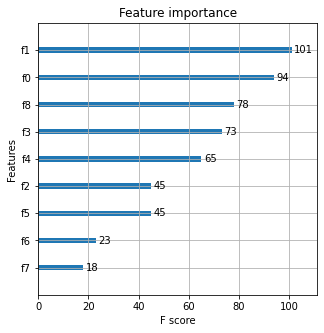

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

## Hyperparameter tunning

In [ ]:
dtrain = xgb.DMatrix(X_o_train, label = Y_o_train)
dtest = xgb.DMatrix(X_test.to_numpy(), label = Y_test)

In [ ]:
data = xgb.DMatrix(X_)

In [ ]:
params = {"objective":"multi:softmax",
          "num_class": max(Y_o_train_xgb)+1,
          'max_depth':6,
          'min_child_weight': 1,
          'eta':.3,
          'subsample': 1,
          'colsample_bytree': 1,
          "eval_metric": "merror"}

- ```num_boost_round```: corresponds to the number of boosting rounds or trees to build. Its optimal value highly depends on the other parameters, and thus it should be re-tuned each time you update a parameter. You could do this by tuning it together with all parameters in a grid-search, but it requires a lot of computational effort. Since trees are built sequentially, instead of fixing the number of rounds at the beginning, we can test our model at each step and see if adding a new tree/round improves performance. If performance haven’t improved for N rounds (N is defined by the variable ```early_stopping_round```), we stop the training and keep the best number of boosting rounds. We still need to pass a num_boost_round which corresponds to the maximum number of boosting rounds that we allow. We set it to a large value hoping to find the optimal number of rounds before reaching it, if we haven't improved performance on our test dataset in early_stopping_round rounds.

In [ ]:
num_boost_round = 999

In order to automatically find the best number of boosting rounds, we need to pass extra parameters on top of the params dictionary, the training DMatrix and num_boost_round:
- ```evals```: a list of pairs (test_dmatrix, name_of_test). Here we will use our dtest DMatrix.
- ```early_stopping_rounds```: The number of rounds without improvements after which we should stop, here we set it to 10.

In [ ]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-merror:0.375
Will train until Test-merror hasn't improved in 10 rounds.
[1]	Test-merror:0.359375
[2]	Test-merror:0.328125
[3]	Test-merror:0.296875
[4]	Test-merror:0.25
[5]	Test-merror:0.25
[6]	Test-merror:0.265625
[7]	Test-merror:0.265625
[8]	Test-merror:0.265625
[9]	Test-merror:0.25
[10]	Test-merror:0.234375
[11]	Test-merror:0.25
[12]	Test-merror:0.25
[13]	Test-merror:0.265625
[14]	Test-merror:0.265625
[15]	Test-merror:0.25
[16]	Test-merror:0.234375
[17]	Test-merror:0.234375
[18]	Test-merror:0.234375
[19]	Test-merror:0.234375
[20]	Test-merror:0.234375
Stopping. Best iteration:
[10]	Test-merror:0.234375



In [ ]:
f1_score(Y_test_xgb, model.predict(X_test.to_numpy()), average = "micro")

AttributeError: ignored

# PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
print(len(X_test.columns))
X_test.head()

9


,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,refractive_index
9,0.129961,0.035989,0.013596,0.729681,0.005698,0.083975,0.000000,0.001100,1.51755
198,0.143944,0.000000,0.026627,0.731732,0.000400,0.090891,0.006406,0.000000,1.51531
67,0.130370,0.036464,0.008691,0.722478,0.001898,0.098402,0.000000,0.001698,1.52152
192,0.141972,0.000000,0.027894,0.734453,0.000400,0.090382,0.003999,0.000900,1.51623
118,0.133040,0.036411,0.015305,0.725518,0.006502,0.080324,0.000000,0.002901,1.51673


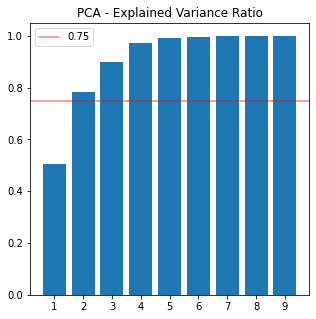

In [ ]:
pca = PCA(n_components=9)
pca.fit(X_train)
cumulative_variance = [sum(pca.explained_variance_ratio_[:i+1]) for i, _ in enumerate(pca.explained_variance_ratio_)]
plt.figure()
plt.title("PCA - Explained Variance Ratio")
plt.axhline(y=0.75, c = "r", alpha = 0.5, label = "0.75")
plt.bar(range(len(cumulative_variance)), cumulative_variance)
plt.xticks(ticks = range(len(cumulative_variance)), labels = range(1,len(cumulative_variance)+1))
plt.legend()
plt.show()

In [ ]:
pca_x = PCA(n_components=2).fit(X_train)
X_train_pca = pca_x.transform(X_train)

In [ ]:
temp_df = pd.DataFrame(X_train_pca)
temp_df["label"] = Y_train.to_numpy()
temp_df["label"] = temp_df["label"].astype(str)

In [ ]:
px.scatter(temp_df, x = 0, y = 1, color = "label")

In [ ]:
pca_x = PCA(n_components=3).fit(X_train)
X_train_pca = pca_x.transform(X_train)

In [ ]:
temp_df = pd.DataFrame(X_train_pca)
temp_df["label"] = Y_train.to_numpy()
temp_df["label"] = temp_df["label"].astype(str)
px.scatter_3d(temp_df, x = 0, y = 1, z = 2, color = "label")

In [ ]:
for i in range(1, len(X_train.columns)+1):
    pca = PCA(n_components=i, random_state=42)
    pca.fit(X_o_train)
    X_o_train_pca = pca.transform(X_o_train)
    model = RandomForestClassifier()
    model.fit(X_o_train_pca, Y_o_train)
    predictions = model.predict(pca.transform(X_test.to_numpy()))
    #predictions_train = model.predict(pca.transform(X_o_train))
    #print(f"Train => {i} components --> F1 = {f1_score(Y_o_train, predictions_train, average = 'micro')} / Balanced_Accuracy = {balanced_accuracy_score(Y_o_train, predictions_train)}")
    print(f"Test => {i} components --> F1 = {f1_score(Y_test, predictions, average = 'micro')} / Balanced_Accuracy = {balanced_accuracy_score(Y_test, predictions)}")

model = RandomForestClassifier()
model.fit(X_o_train_pca, Y_o_train)
predictions = model.predict(pca.transform(X_test.to_numpy()))
# predictions_train = model.predict(pca.transform(X_o_train))
# print(f"Train => {i} components --> F1 = {f1_score(Y_o_train, predictions_train, average = 'micro')} / Balanced_Accuracy = {balanced_accuracy_score(Y_o_train, predictions_train)}")
print(f"Test => All components --> F1 = {f1_score(Y_test, predictions, average = 'micro')} / Balanced_Accuracy = {balanced_accuracy_score(Y_test, predictions)}")


Test => 1 components --> F1 = 0.515625 / Balanced_Accuracy = 0.5458754208754208
Test => 2 components --> F1 = 0.5625 / Balanced_Accuracy = 0.549452861952862
Test => 3 components --> F1 = 0.53125 / Balanced_Accuracy = 0.4591750841750842
Test => 4 components --> F1 = 0.6875 / Balanced_Accuracy = 0.6837121212121212
Test => 5 components --> F1 = 0.65625 / Balanced_Accuracy = 0.6675084175084175
Test => 6 components --> F1 = 0.734375 / Balanced_Accuracy = 0.7462121212121212
Test => 7 components --> F1 = 0.71875 / Balanced_Accuracy = 0.6906565656565656
Test => 8 components --> F1 = 0.734375 / Balanced_Accuracy = 0.7117003367003366
Test => 9 components --> F1 = 0.71875 / Balanced_Accuracy = 0.6906565656565656
Test => All components --> F1 = 0.6875 / Balanced_Accuracy = 0.6744528619528619


# NN

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow_addons as tfa

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
encoder.fit(Y_o_train)
Y_o_train_xgb = encoder.transform(Y_o_train)
Y_test_xgb = encoder.transform(Y_test)

In [ ]:
Y_test.max()

7

In [ ]:
nn = tf.keras.Sequential([
                          tf.keras.layers.Dense(100, input_shape = (X_test.shape[-1],), activation="relu"),
                          tf.keras.layers.Dense(50, activation = "relu"),
                          tf.keras.layers.Dense(25, activation = "relu"),
                          tf.keras.layers.Dense(15, activation = "relu"),
                          tf.keras.layers.Dense(Y_test_xgb.max()+1, activation = "softmax")
])

In [ ]:
nn.compile(optimizer = tf.optimizers.Adam(learning_rate=0.001), loss = tf.losses.SparseCategoricalCrossentropy(), metrics="accuracy")

In [ ]:
history = nn.fit(X_o_train, Y_o_train_xgb, batch_size=24, epochs = 500, validation_data = (X_test, Y_test_xgb), verbose = 1, shuffle=False)

Epoch 1/500
13/13 [==============================] - 0s 14ms/step - loss: 1.8245 - accuracy: 0.1667 - val_loss: 1.7644 - val_accuracy: 0.0625
Epoch 2/500
13/13 [==============================] - 0s 4ms/step - loss: 1.8019 - accuracy: 0.1667 - val_loss: 1.7670 - val_accuracy: 0.0625
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 1.7966 - accuracy: 0.1667 - val_loss: 1.7701 - val_accuracy: 0.0625
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 1.7962 - accuracy: 0.1667 - val_loss: 1.7708 - val_accuracy: 0.0625
Epoch 5/500
13/13 [==============================] - 0s 4ms/step - loss: 1.7954 - accuracy: 0.1667 - val_loss: 1.7711 - val_accuracy: 0.0625
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 1.7948 - accuracy: 0.0673 - val_loss: 1.7717 - val_accuracy: 0.3750
Epoch 7/500
13/13 [==============================] - 0s 3ms/step - loss: 1.7944 - accuracy: 0.1667 - val_loss: 1.7724 - val_accuracy: 0.3750
Epoch 8/500


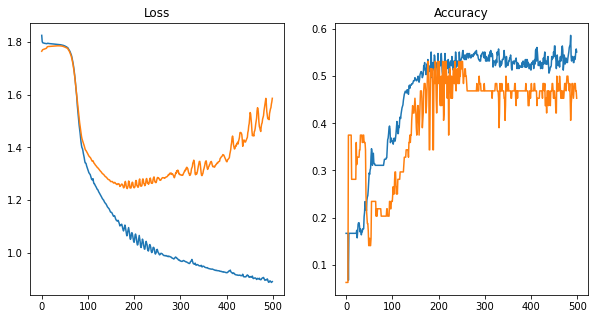

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Loss")
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Validation")

plt.subplot(1,2,2)
plt.title("Accuracy")
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Validation")

plt.show()

# PIPELINE